In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/car-price-prediction-ru/sample_submission.csv
/kaggle/input/car-price-prediction-ru/train.csv
/kaggle/input/car-price-prediction-ru/test.csv


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
import lightgbm as lgb
from sklearn.metrics import mean_squared_log_error
from sklearn.model_selection import train_test_split

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
submission = pd.read_csv("/kaggle/input/car-price-prediction-ru/sample_submission.csv")
submission.head()

,car_id,predicted_price
0,71542,0
1,29263,0
2,27118,0
3,24436,0
4,28254,0


In [4]:
train_data = pd.read_csv("/kaggle/input/car-price-prediction-ru/train.csv")
train_data.head()

,car_id,car_mark,year,mileage,engine,drive,body,color,transmission,brand,price
0,63407,Subaru Legacy I,1994,250 000 км,2.2 л / 136 л.с. / Бензин,полный,седан,серебристый,автомат,Subaru,85000
1,15174,Daewoo Nexia I,1998,262 000 км,1.5 л / 75 л.с. / Бензин,передний,седан,красный,механика,Daewoo,90000
2,40267,Mazda CX-5 I Рестайлинг,2016,95 000 км,2.0 л / 150 л.с. / Бензин,полный,внедорожник 5 дв.,белый,автомат,Mazda,1695000
3,31131,Kia Seltos I,2022,Новый,2.0 л / 149 л.с. / Бензин,передний,внедорожник 5 дв.,Prestige,вариатор,Kia,2284900
4,55806,Renault Logan II Рестайлинг,2022,Новый,1.6 л / 82 л.с. / Бензин,передний,седан,Life,механика,Renault,921300


In [5]:
#test data

test_data = pd.read_csv("/kaggle/input/car-price-prediction-ru/test.csv")
test_data.head()

,car_id,car_mark,year,mileage,engine,drive,body,color,transmission,brand
0,71542,Volkswagen Tiguan II,2017,80 277 км,2.0 л / 150 л.с. / Дизель,полный,внедорожник 5 дв.,белый,робот,Volkswagen
1,29263,Infiniti G G25 IV,2010,224 000 км,2.5 л / 222 л.с. / Бензин,задний,седан,серый,автомат,Infiniti
2,27118,Hyundai Creta II,2022,Новый,2.0 л / 150 л.с. / Бензин,передний,внедорожник 5 дв.,Family,автомат,Hyundai
3,24436,Honda Civic VII,2001,194 000 км,1.7 л / 125 л.с. / Бензин,передний,седан,зелёный,автомат,Honda
4,28254,Hyundai Creta I Рестайлинг,2021,15 500 км,1.6 л / 121 л.с. / Бензин,полный,внедорожник 5 дв.,серебристый,механика,Hyundai


In [6]:
train_data.car_id

0        63407
1        15174
2        40267
3        31131
4        55806
         ...  
57061    25365
57062    48056
57063    59011
57064    67224
57065    71530
Name: car_id, Length: 57066, dtype: int64

In [7]:
car_id_series = train_data['car_id']

# Convert 'car_id' to a sequential basis
sequential_car_id = car_id_series.rank(method='dense')

print(sequential_car_id)

train_data.car_id = sequential_car_id


0        47541.0
1        11390.0
2        30241.0
3        23434.0
4        41895.0
          ...   
57061    19092.0
57062    36075.0
57063    44273.0
57064    50367.0
57065    53610.0
Name: car_id, Length: 57066, dtype: float64


In [8]:
car_id_series2 = test_data['car_id']

# Convert 'car_id' to a sequential basis
sequential_car_id2 = car_id_series2.rank(method='dense')

print(sequential_car_id2) 

test_data.car_id = sequential_car_id2



0        17924.0
1         7271.0
2         6716.0
3         6052.0
4         7007.0
          ...   
19018    17763.0
19019    12745.0
19020     9698.0
19021    16560.0
19022     7125.0
Name: car_id, Length: 19023, dtype: float64


In [9]:
#dealing with year
train_data.year

0        1994
1        1998
2        2016
3        2022
4        2022
         ... 
57061    2019
57062    2022
57063    2022
57064    1999
57065    2015
Name: year, Length: 57066, dtype: int64

<AxesSubplot: xlabel='year', ylabel='price'>

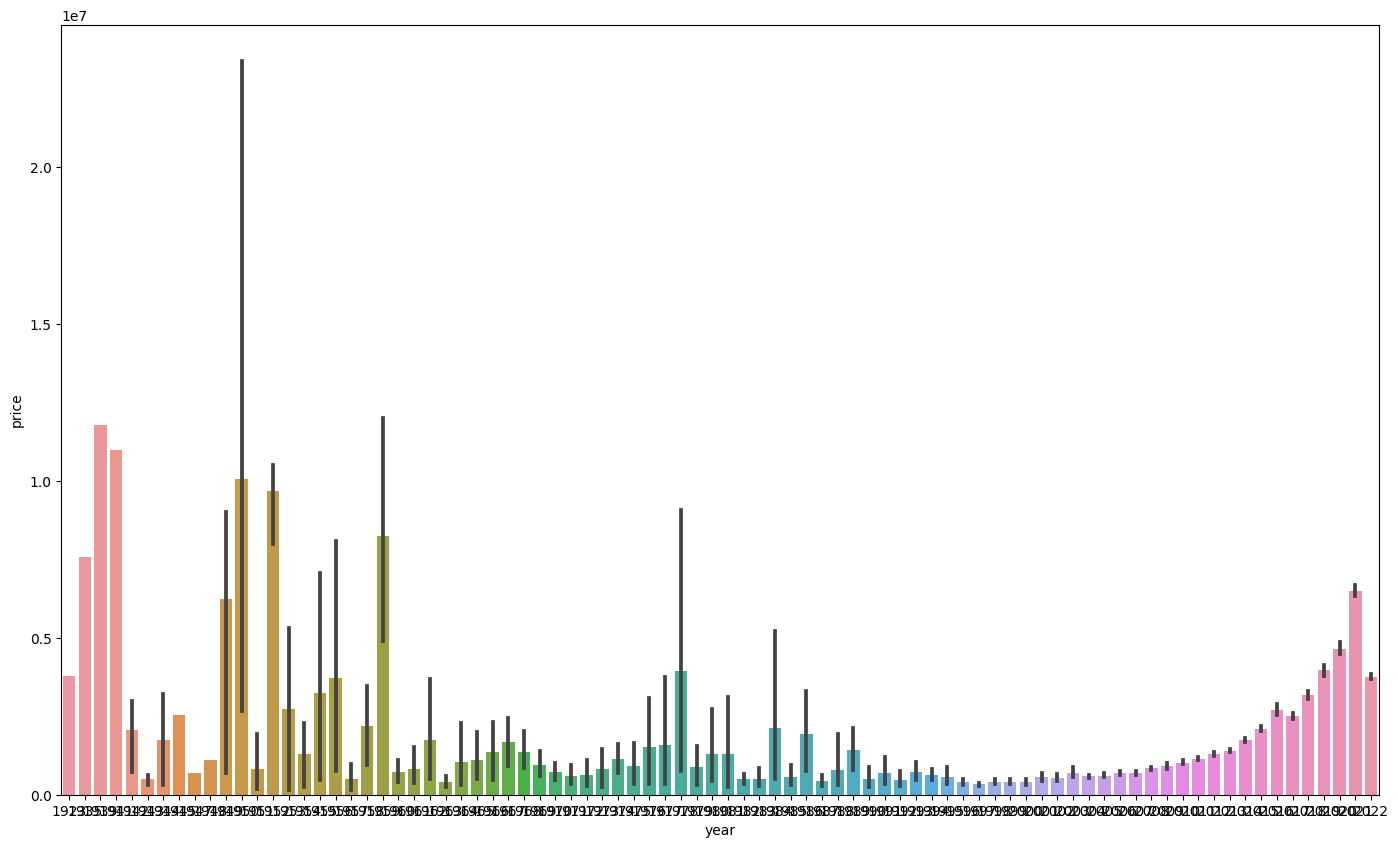

In [10]:
plt.figure(figsize = (17,10))
sns.barplot(x = train_data["year"], y = train_data["price"])

<AxesSubplot: xlabel='year', ylabel='price'>

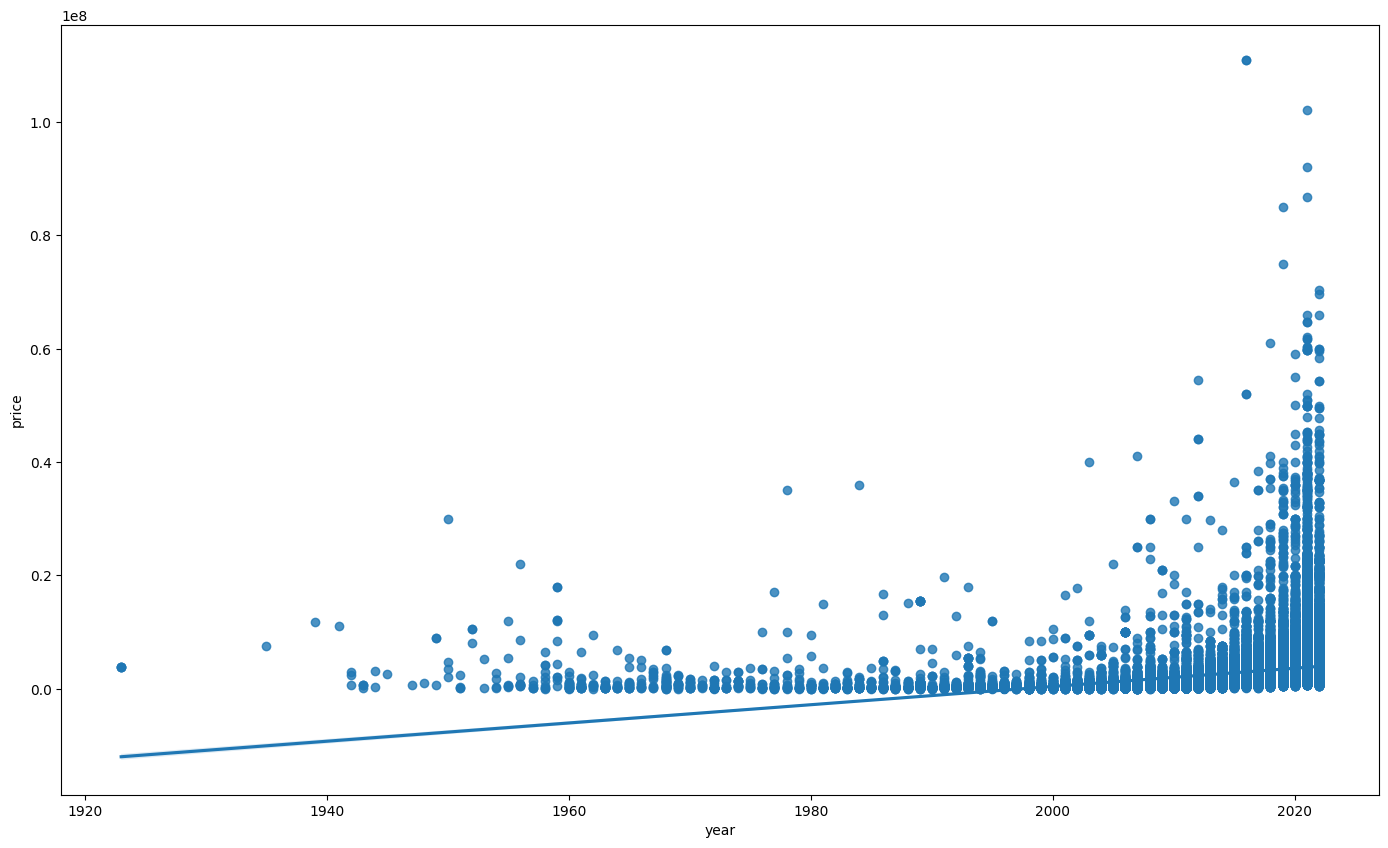

In [11]:
plt.figure(figsize = (17,10))
sns.regplot(x = train_data["year"], y = train_data["price"])

In [12]:
age = train_data.year
age2 = test_data.year

In [13]:
max_year = max(age)
print(max(age))


2022


In [14]:
max_year2 = max(age2)
print(max(age2))

2022


In [15]:
train_data.year = max_year - age
test_data.year = max_year2 - age2

In [16]:
train_data.year

0        28
1        24
2         6
3         0
4         0
         ..
57061     3
57062     0
57063     0
57064    23
57065     7
Name: year, Length: 57066, dtype: int64

In [17]:
test_data.year

0         5
1        12
2         0
3        21
4         1
         ..
19018     7
19019     8
19020     6
19021     0
19022     9
Name: year, Length: 19023, dtype: int64

In [18]:
train_data.car_mark

0                              Subaru Legacy I
1                               Daewoo Nexia I
2                      Mazda CX-5 I Рестайлинг
3                                 Kia Seltos I
4                  Renault Logan II Рестайлинг
                         ...                  
57061                       Hyundai Solaris II
57062    Mitsubishi Outlander III Рестайлинг 3
57063                           Skoda Rapid II
57064                           Toyota Altezza
57065                  Volkswagen Caravelle T6
Name: car_mark, Length: 57066, dtype: object

In [19]:
unique_car_mark = train_data.car_mark.nunique()
print(unique_car_mark)

3649


In [20]:
test_data.car_mark.nunique()

2699

<AxesSubplot: xlabel='car_mark', ylabel='price'>

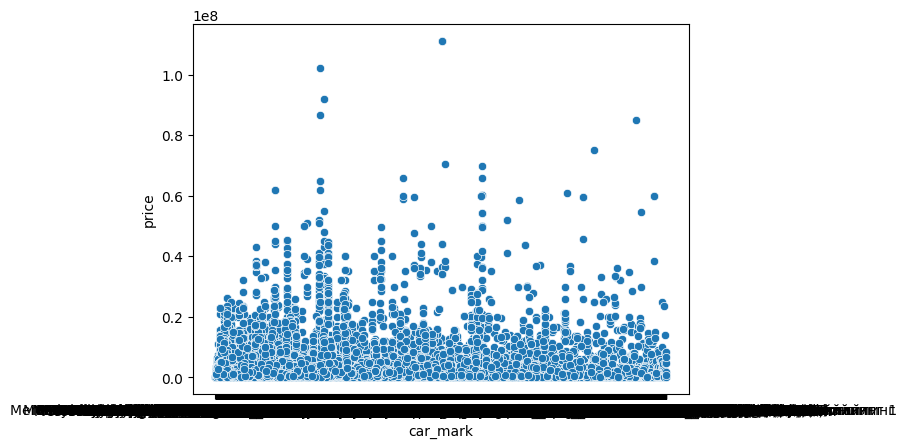

In [21]:
sns.scatterplot(x = train_data["car_mark"], y = train_data["price"] )

In [22]:
train_data


,car_id,car_mark,year,mileage,engine,drive,body,color,transmission,brand,price
0,47541.0,Subaru Legacy I,28,250 000 км,2.2 л / 136 л.с. / Бензин,полный,седан,серебристый,автомат,Subaru,85000
1,11390.0,Daewoo Nexia I,24,262 000 км,1.5 л / 75 л.с. / Бензин,передний,седан,красный,механика,Daewoo,90000
2,30241.0,Mazda CX-5 I Рестайлинг,6,95 000 км,2.0 л / 150 л.с. / Бензин,полный,внедорожник 5 дв.,белый,автомат,Mazda,1695000
3,23434.0,Kia Seltos I,0,Новый,2.0 л / 149 л.с. / Бензин,передний,внедорожник 5 дв.,Prestige,вариатор,Kia,2284900
4,41895.0,Renault Logan II Рестайлинг,0,Новый,1.6 л / 82 л.с. / Бензин,передний,седан,Life,механика,Renault,921300
...,...,...,...,...,...,...,...,...,...,...,...
57061,19092.0,Hyundai Solaris II,3,47 224 км,1.6 л / 123 л.с. / Бензин,передний,седан,белый,автомат,Hyundai,1079000
57062,36075.0,Mitsubishi Outlander III Рестайлинг 3,0,Новый,2.0 л / 146 л.с. / Бензин,полный,внедорожник 5 дв.,Intense+,вариатор,Mitsubishi,2818000
57063,44273.0,Skoda Rapid II,0,Новый,1.6 л / 90 л.с. / Бензин,передний,лифтбек,Ambition,механика,Skoda,1253050
57064,50367.0,Toyota Altezza,23,170 000 км,2.0 л / 210 л.с. / Бензин,задний,седан,серебристый,механика,Toyota,600000


In [23]:
target_encoding = train_data.groupby("car_mark")["price"].mean()
train_data.car_mark = train_data["car_mark"].map(target_encoding)

test_data.car_mark = test_data.car_mark.map(target_encoding)

In [24]:
train_data

,car_id,car_mark,year,mileage,engine,drive,body,color,transmission,brand,price
0,47541.0,1.049833e+05,28,250 000 км,2.2 л / 136 л.с. / Бензин,полный,седан,серебристый,автомат,Subaru,85000
1,11390.0,1.065118e+05,24,262 000 км,1.5 л / 75 л.с. / Бензин,передний,седан,красный,механика,Daewoo,90000
2,30241.0,1.836203e+06,6,95 000 км,2.0 л / 150 л.с. / Бензин,полный,внедорожник 5 дв.,белый,автомат,Mazda,1695000
3,23434.0,2.254772e+06,0,Новый,2.0 л / 149 л.с. / Бензин,передний,внедорожник 5 дв.,Prestige,вариатор,Kia,2284900
4,41895.0,8.868827e+05,0,Новый,1.6 л / 82 л.с. / Бензин,передний,седан,Life,механика,Renault,921300
...,...,...,...,...,...,...,...,...,...,...,...
57061,19092.0,1.025762e+06,3,47 224 км,1.6 л / 123 л.с. / Бензин,передний,седан,белый,автомат,Hyundai,1079000
57062,36075.0,2.681307e+06,0,Новый,2.0 л / 146 л.с. / Бензин,полный,внедорожник 5 дв.,Intense+,вариатор,Mitsubishi,2818000
57063,44273.0,1.418106e+06,0,Новый,1.6 л / 90 л.с. / Бензин,передний,лифтбек,Ambition,механика,Skoda,1253050
57064,50367.0,7.055556e+05,23,170 000 км,2.0 л / 210 л.с. / Бензин,задний,седан,серебристый,механика,Toyota,600000


In [25]:
train_data.mileage

0        250 000 км
1        262 000 км
2         95 000 км
3             Новый
4             Новый
            ...    
57061     47 224 км
57062         Новый
57063         Новый
57064    170 000 км
57065    164 000 км
Name: mileage, Length: 57066, dtype: object

In [26]:
import re

# Assuming you have a DataFrame called 'data' with a column named 'column_name'
train_data['mileage'] = train_data['mileage'].apply(lambda x: re.sub('[^0-9]', '', str(x)))

test_data.mileage = test_data["mileage"].apply(lambda x : re.sub("[^0-9]","",str(x)))

In [27]:
test_data.mileage
test_data['mileage'] = pd.to_numeric(test_data['mileage'], errors='coerce')

In [28]:
train_data.mileage

0        250000
1        262000
2         95000
3              
4              
          ...  
57061     47224
57062          
57063          
57064    170000
57065    164000
Name: mileage, Length: 57066, dtype: object

In [29]:
train_data.engine

0        2.2 л / 136 л.с. / Бензин
1         1.5 л / 75 л.с. / Бензин
2        2.0 л / 150 л.с. / Бензин
3        2.0 л / 149 л.с. / Бензин
4         1.6 л / 82 л.с. / Бензин
                   ...            
57061    1.6 л / 123 л.с. / Бензин
57062    2.0 л / 146 л.с. / Бензин
57063     1.6 л / 90 л.с. / Бензин
57064    2.0 л / 210 л.с. / Бензин
57065    2.0 л / 102 л.с. / Дизель
Name: engine, Length: 57066, dtype: object

In [30]:
train_data['feature_engine_capacity'] = train_data['engine'].str.extract(r'(\d+\.?\d*) л')[0]
#train_data['feature_horsepower'] = train_data['engine'].str.extract(r'(\d+) л\.с\.')[0]
train_data['feature_fuel_type'] = train_data['engine'].str.extract(r'(\w+)$')[0]

train_data['feature_engine_capacity'] = pd.to_numeric(train_data['feature_engine_capacity'])
#train_data['feature_horsepower'] = pd.to_numeric(train_data['feature_horsepower'])

test_data["feature_engine_capacity"] = test_data["engine"].str.extract(r'(\d+\.?\d*) л')[0]
test_data["feature_fuel_type"] = test_data['engine'].str.extract(r'(\w+)$')[0]

test_data['feature_engine_capacity'] = pd.to_numeric(test_data['feature_engine_capacity'])

In [31]:
train_data = train_data.drop("engine", axis = 1)
test_data = test_data.drop("engine", axis = 1)

In [32]:
train_data

,car_id,car_mark,year,mileage,drive,body,color,transmission,brand,price,feature_engine_capacity,feature_fuel_type
0,47541.0,1.049833e+05,28,250000,полный,седан,серебристый,автомат,Subaru,85000,2.2,Бензин
1,11390.0,1.065118e+05,24,262000,передний,седан,красный,механика,Daewoo,90000,1.5,Бензин
2,30241.0,1.836203e+06,6,95000,полный,внедорожник 5 дв.,белый,автомат,Mazda,1695000,2.0,Бензин
3,23434.0,2.254772e+06,0,,передний,внедорожник 5 дв.,Prestige,вариатор,Kia,2284900,2.0,Бензин
4,41895.0,8.868827e+05,0,,передний,седан,Life,механика,Renault,921300,1.6,Бензин
...,...,...,...,...,...,...,...,...,...,...,...,...
57061,19092.0,1.025762e+06,3,47224,передний,седан,белый,автомат,Hyundai,1079000,1.6,Бензин
57062,36075.0,2.681307e+06,0,,полный,внедорожник 5 дв.,Intense+,вариатор,Mitsubishi,2818000,2.0,Бензин
57063,44273.0,1.418106e+06,0,,передний,лифтбек,Ambition,механика,Skoda,1253050,1.6,Бензин
57064,50367.0,7.055556e+05,23,170000,задний,седан,серебристый,механика,Toyota,600000,2.0,Бензин


In [33]:
train_data.feature_fuel_type.nunique()

5

In [34]:
test_data.feature_fuel_type.nunique()

5

In [35]:
train_data = pd.get_dummies(train_data, columns =["feature_fuel_type"])
test_data = pd.get_dummies(test_data, columns = ["feature_fuel_type"])

In [36]:
train_data

,car_id,car_mark,year,mileage,drive,body,color,transmission,brand,price,feature_engine_capacity,feature_fuel_type_Бензин,feature_fuel_type_Газ,feature_fuel_type_Гибрид,feature_fuel_type_Дизель,feature_fuel_type_Электро
0,47541.0,1.049833e+05,28,250000,полный,седан,серебристый,автомат,Subaru,85000,2.2,1,0,0,0,0
1,11390.0,1.065118e+05,24,262000,передний,седан,красный,механика,Daewoo,90000,1.5,1,0,0,0,0
2,30241.0,1.836203e+06,6,95000,полный,внедорожник 5 дв.,белый,автомат,Mazda,1695000,2.0,1,0,0,0,0
3,23434.0,2.254772e+06,0,,передний,внедорожник 5 дв.,Prestige,вариатор,Kia,2284900,2.0,1,0,0,0,0
4,41895.0,8.868827e+05,0,,передний,седан,Life,механика,Renault,921300,1.6,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57061,19092.0,1.025762e+06,3,47224,передний,седан,белый,автомат,Hyundai,1079000,1.6,1,0,0,0,0
57062,36075.0,2.681307e+06,0,,полный,внедорожник 5 дв.,Intense+,вариатор,Mitsubishi,2818000,2.0,1,0,0,0,0
57063,44273.0,1.418106e+06,0,,передний,лифтбек,Ambition,механика,Skoda,1253050,1.6,1,0,0,0,0
57064,50367.0,7.055556e+05,23,170000,задний,седан,серебристый,механика,Toyota,600000,2.0,1,0,0,0,0


In [37]:
train_data.brand.nunique()

131

In [38]:
test_data.brand.nunique()

116

In [39]:
frequency_encoding_brand = train_data['brand'].value_counts(normalize = True)
train_data.brand = train_data["brand"].map(frequency_encoding_brand)

frequency_encoding_brand2 = test_data["brand"].value_counts(normalize = True)
test_data.brand = test_data["brand"].map(frequency_encoding_brand2)

In [40]:
train_data

,car_id,car_mark,year,mileage,drive,body,color,transmission,brand,price,feature_engine_capacity,feature_fuel_type_Бензин,feature_fuel_type_Газ,feature_fuel_type_Гибрид,feature_fuel_type_Дизель,feature_fuel_type_Электро
0,47541.0,1.049833e+05,28,250000,полный,седан,серебристый,автомат,0.009270,85000,2.2,1,0,0,0,0
1,11390.0,1.065118e+05,24,262000,передний,седан,красный,механика,0.017015,90000,1.5,1,0,0,0,0
2,30241.0,1.836203e+06,6,95000,полный,внедорожник 5 дв.,белый,автомат,0.021239,1695000,2.0,1,0,0,0,0
3,23434.0,2.254772e+06,0,,передний,внедорожник 5 дв.,Prestige,вариатор,0.044037,2284900,2.0,1,0,0,0,0
4,41895.0,8.868827e+05,0,,передний,седан,Life,механика,0.048838,921300,1.6,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57061,19092.0,1.025762e+06,3,47224,передний,седан,белый,автомат,0.048716,1079000,1.6,1,0,0,0,0
57062,36075.0,2.681307e+06,0,,полный,внедорожник 5 дв.,Intense+,вариатор,0.049487,2818000,2.0,1,0,0,0,0
57063,44273.0,1.418106e+06,0,,передний,лифтбек,Ambition,механика,0.048295,1253050,1.6,1,0,0,0,0
57064,50367.0,7.055556e+05,23,170000,задний,седан,серебристый,механика,0.048330,600000,2.0,1,0,0,0,0


In [41]:
train_data.transmission.nunique()

66

In [42]:
test_data.transmission.nunique()

51

In [43]:
frequency_encoding_transmission = train_data['transmission'].value_counts(normalize = True)
train_data.transmission = train_data["transmission"].map(frequency_encoding_transmission)

frequency_encoding_transmission2 = test_data['transmission'].value_counts(normalize = True)
test_data.transmission = test_data["transmission"].map(frequency_encoding_transmission2)

In [44]:
train_data

,car_id,car_mark,year,mileage,drive,body,color,transmission,brand,price,feature_engine_capacity,feature_fuel_type_Бензин,feature_fuel_type_Газ,feature_fuel_type_Гибрид,feature_fuel_type_Дизель,feature_fuel_type_Электро
0,47541.0,1.049833e+05,28,250000,полный,седан,серебристый,0.523937,0.009270,85000,2.2,1,0,0,0,0
1,11390.0,1.065118e+05,24,262000,передний,седан,красный,0.227316,0.017015,90000,1.5,1,0,0,0,0
2,30241.0,1.836203e+06,6,95000,полный,внедорожник 5 дв.,белый,0.523937,0.021239,1695000,2.0,1,0,0,0,0
3,23434.0,2.254772e+06,0,,передний,внедорожник 5 дв.,Prestige,0.108471,0.044037,2284900,2.0,1,0,0,0,0
4,41895.0,8.868827e+05,0,,передний,седан,Life,0.227316,0.048838,921300,1.6,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57061,19092.0,1.025762e+06,3,47224,передний,седан,белый,0.523937,0.048716,1079000,1.6,1,0,0,0,0
57062,36075.0,2.681307e+06,0,,полный,внедорожник 5 дв.,Intense+,0.108471,0.049487,2818000,2.0,1,0,0,0,0
57063,44273.0,1.418106e+06,0,,передний,лифтбек,Ambition,0.227316,0.048295,1253050,1.6,1,0,0,0,0
57064,50367.0,7.055556e+05,23,170000,задний,седан,серебристый,0.227316,0.048330,600000,2.0,1,0,0,0,0


In [45]:
train_data.body.nunique()

26

In [46]:
test_data.body.nunique()

26

In [47]:
frequency_encoding_body = train_data['body'].value_counts(normalize = True)
train_data.body = train_data["body"].map(frequency_encoding_body)

frequency_encoding_body2 = test_data['body'].value_counts(normalize = True)
test_data.body = test_data["body"].map(frequency_encoding_body2)

In [48]:
train_data

,car_id,car_mark,year,mileage,drive,body,color,transmission,brand,price,feature_engine_capacity,feature_fuel_type_Бензин,feature_fuel_type_Газ,feature_fuel_type_Гибрид,feature_fuel_type_Дизель,feature_fuel_type_Электро
0,47541.0,1.049833e+05,28,250000,полный,0.268566,серебристый,0.523937,0.009270,85000,2.2,1,0,0,0,0
1,11390.0,1.065118e+05,24,262000,передний,0.268566,красный,0.227316,0.017015,90000,1.5,1,0,0,0,0
2,30241.0,1.836203e+06,6,95000,полный,0.455315,белый,0.523937,0.021239,1695000,2.0,1,0,0,0,0
3,23434.0,2.254772e+06,0,,передний,0.455315,Prestige,0.108471,0.044037,2284900,2.0,1,0,0,0,0
4,41895.0,8.868827e+05,0,,передний,0.268566,Life,0.227316,0.048838,921300,1.6,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57061,19092.0,1.025762e+06,3,47224,передний,0.268566,белый,0.523937,0.048716,1079000,1.6,1,0,0,0,0
57062,36075.0,2.681307e+06,0,,полный,0.455315,Intense+,0.108471,0.049487,2818000,2.0,1,0,0,0,0
57063,44273.0,1.418106e+06,0,,передний,0.051467,Ambition,0.227316,0.048295,1253050,1.6,1,0,0,0,0
57064,50367.0,7.055556e+05,23,170000,задний,0.268566,серебристый,0.227316,0.048330,600000,2.0,1,0,0,0,0


In [49]:
train_data.drive.nunique()

3

In [50]:
test_data.drive.nunique()

3

In [51]:
train_data = pd.get_dummies(train_data, columns = ["drive"])

test_data = pd.get_dummies(test_data, columns = ["drive"])

In [52]:
train_data

,car_id,car_mark,year,mileage,body,color,transmission,brand,price,feature_engine_capacity,feature_fuel_type_Бензин,feature_fuel_type_Газ,feature_fuel_type_Гибрид,feature_fuel_type_Дизель,feature_fuel_type_Электро,drive_задний,drive_передний,drive_полный
0,47541.0,1.049833e+05,28,250000,0.268566,серебристый,0.523937,0.009270,85000,2.2,1,0,0,0,0,0,0,1
1,11390.0,1.065118e+05,24,262000,0.268566,красный,0.227316,0.017015,90000,1.5,1,0,0,0,0,0,1,0
2,30241.0,1.836203e+06,6,95000,0.455315,белый,0.523937,0.021239,1695000,2.0,1,0,0,0,0,0,0,1
3,23434.0,2.254772e+06,0,,0.455315,Prestige,0.108471,0.044037,2284900,2.0,1,0,0,0,0,0,1,0
4,41895.0,8.868827e+05,0,,0.268566,Life,0.227316,0.048838,921300,1.6,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57061,19092.0,1.025762e+06,3,47224,0.268566,белый,0.523937,0.048716,1079000,1.6,1,0,0,0,0,0,1,0
57062,36075.0,2.681307e+06,0,,0.455315,Intense+,0.108471,0.049487,2818000,2.0,1,0,0,0,0,0,0,1
57063,44273.0,1.418106e+06,0,,0.051467,Ambition,0.227316,0.048295,1253050,1.6,1,0,0,0,0,0,1,0
57064,50367.0,7.055556e+05,23,170000,0.268566,серебристый,0.227316,0.048330,600000,2.0,1,0,0,0,0,1,0,0


In [53]:
train_data.color.nunique()

522

In [54]:
test_data.color.nunique()

406

In [55]:
frequency_encoding_color = train_data['color'].value_counts(normalize = True)
train_data.color = train_data["color"].map(frequency_encoding_color)

frequency_encoding_color2 = test_data['color'].value_counts(normalize = True)
test_data.color = test_data["color"].map(frequency_encoding_color2)

In [56]:
train_data

,car_id,car_mark,year,mileage,body,color,transmission,brand,price,feature_engine_capacity,feature_fuel_type_Бензин,feature_fuel_type_Газ,feature_fuel_type_Гибрид,feature_fuel_type_Дизель,feature_fuel_type_Электро,drive_задний,drive_передний,drive_полный
0,47541.0,1.049833e+05,28,250000,0.268566,0.064907,0.523937,0.009270,85000,2.2,1,0,0,0,0,0,0,1
1,11390.0,1.065118e+05,24,262000,0.268566,0.041443,0.227316,0.017015,90000,1.5,1,0,0,0,0,0,1,0
2,30241.0,1.836203e+06,6,95000,0.455315,0.151088,0.523937,0.021239,1695000,2.0,1,0,0,0,0,0,0,1
3,23434.0,2.254772e+06,0,,0.455315,0.009060,0.108471,0.044037,2284900,2.0,1,0,0,0,0,0,1,0
4,41895.0,8.868827e+05,0,,0.268566,0.005397,0.227316,0.048838,921300,1.6,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57061,19092.0,1.025762e+06,3,47224,0.268566,0.151088,0.523937,0.048716,1079000,1.6,1,0,0,0,0,0,1,0
57062,36075.0,2.681307e+06,0,,0.455315,0.007605,0.108471,0.049487,2818000,2.0,1,0,0,0,0,0,0,1
57063,44273.0,1.418106e+06,0,,0.051467,0.004381,0.227316,0.048295,1253050,1.6,1,0,0,0,0,0,1,0
57064,50367.0,7.055556e+05,23,170000,0.268566,0.064907,0.227316,0.048330,600000,2.0,1,0,0,0,0,1,0,0


In [57]:
train_data.isnull().sum()

car_id                         0
car_mark                       0
year                           0
mileage                        0
body                           0
color                          0
transmission                   0
brand                          0
price                          0
feature_engine_capacity      346
feature_fuel_type_Бензин       0
feature_fuel_type_Газ          0
feature_fuel_type_Гибрид       0
feature_fuel_type_Дизель       0
feature_fuel_type_Электро      0
drive_задний                   0
drive_передний                 0
drive_полный                   0
dtype: int64

In [58]:
test_data.isnull().sum()

car_id                          0
car_mark                      243
year                            0
mileage                      4443
body                            0
color                           0
transmission                    0
brand                           0
feature_engine_capacity       143
feature_fuel_type_Бензин        0
feature_fuel_type_Газ           0
feature_fuel_type_Гибрид        0
feature_fuel_type_Дизель        0
feature_fuel_type_Электро       0
drive_задний                    0
drive_передний                  0
drive_полный                    0
dtype: int64

In [59]:
print(train_data['feature_engine_capacity'].dtype)

float64


In [60]:
seri = train_data["feature_engine_capacity"]
value = seri.mean()

seri = seri.fillna(value)
seri = seri.astype("float64")
print(seri)

0        2.2
1        1.5
2        2.0
3        2.0
4        1.6
        ... 
57061    1.6
57062    2.0
57063    1.6
57064    2.0
57065    2.0
Name: feature_engine_capacity, Length: 57066, dtype: float64


In [61]:
train_data.feature_engine_capacity = seri

In [62]:
#from sklearn.impute import SimpleImputer
#imputer = SimpleImputer(strategy = 'mean')
#imputer.fit('feature_engine_capacity')
#imputed.feature_engine_capacity = pd.DataFrame(imputer.transform(feature_engine_capacity), columns = ['feature_engine_capacity'])

In [63]:
train_data.isnull().sum()

car_id                       0
car_mark                     0
year                         0
mileage                      0
body                         0
color                        0
transmission                 0
brand                        0
price                        0
feature_engine_capacity      0
feature_fuel_type_Бензин     0
feature_fuel_type_Газ        0
feature_fuel_type_Гибрид     0
feature_fuel_type_Дизель     0
feature_fuel_type_Электро    0
drive_задний                 0
drive_передний               0
drive_полный                 0
dtype: int64

In [64]:
train_data

,car_id,car_mark,year,mileage,body,color,transmission,brand,price,feature_engine_capacity,feature_fuel_type_Бензин,feature_fuel_type_Газ,feature_fuel_type_Гибрид,feature_fuel_type_Дизель,feature_fuel_type_Электро,drive_задний,drive_передний,drive_полный
0,47541.0,1.049833e+05,28,250000,0.268566,0.064907,0.523937,0.009270,85000,2.2,1,0,0,0,0,0,0,1
1,11390.0,1.065118e+05,24,262000,0.268566,0.041443,0.227316,0.017015,90000,1.5,1,0,0,0,0,0,1,0
2,30241.0,1.836203e+06,6,95000,0.455315,0.151088,0.523937,0.021239,1695000,2.0,1,0,0,0,0,0,0,1
3,23434.0,2.254772e+06,0,,0.455315,0.009060,0.108471,0.044037,2284900,2.0,1,0,0,0,0,0,1,0
4,41895.0,8.868827e+05,0,,0.268566,0.005397,0.227316,0.048838,921300,1.6,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57061,19092.0,1.025762e+06,3,47224,0.268566,0.151088,0.523937,0.048716,1079000,1.6,1,0,0,0,0,0,1,0
57062,36075.0,2.681307e+06,0,,0.455315,0.007605,0.108471,0.049487,2818000,2.0,1,0,0,0,0,0,0,1
57063,44273.0,1.418106e+06,0,,0.051467,0.004381,0.227316,0.048295,1253050,1.6,1,0,0,0,0,0,1,0
57064,50367.0,7.055556e+05,23,170000,0.268566,0.064907,0.227316,0.048330,600000,2.0,1,0,0,0,0,1,0,0


In [65]:
train_data.corr()

/tmp/ipykernel_21/1402113604.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train_data.corr()


,car_id,car_mark,year,body,color,transmission,brand,price,feature_engine_capacity,feature_fuel_type_Бензин,feature_fuel_type_Газ,feature_fuel_type_Гибрид,feature_fuel_type_Дизель,feature_fuel_type_Электро,drive_задний,drive_передний,drive_полный
car_id,1.000000,-0.084824,0.087244,-0.027370,0.005507,-0.045865,0.079017,-0.081427,-4.636186e-02,0.043002,0.001839,0.023493,-0.051809,1.125457e-02,0.015778,0.013787,-0.021517
car_mark,-0.084824,1.000000,-0.313858,0.162285,-0.055260,0.164187,-0.011744,0.960096,4.467691e-01,-0.227358,-0.006592,0.017791,0.211222,9.162879e-02,0.020923,-0.364024,0.357093
year,0.087244,-0.313858,1.000000,-0.276929,0.202281,0.000162,-0.192420,-0.310529,8.347366e-02,0.079848,-0.006848,0.007809,-0.073136,-4.906544e-02,0.316346,0.004812,-0.157433
body,-0.027370,0.162285,-0.276929,1.000000,-0.068614,0.082179,-0.002593,0.155228,2.058510e-01,-0.128409,-0.015413,-0.036331,0.140593,5.850646e-04,-0.183032,-0.401626,0.493392
color,0.005507,-0.055260,0.202281,-0.068614,1.000000,0.147980,0.029174,-0.086973,2.004525e-01,-0.089364,0.005019,0.023003,0.084059,1.412214e-02,0.064990,-0.085334,0.054728
transmission,-0.045865,0.164187,0.000162,0.082179,0.147980,1.000000,-0.011563,0.159147,3.539863e-01,-0.205586,-0.011589,-0.036134,0.253052,-1.526620e-01,0.052962,-0.213961,0.190273
brand,0.079017,-0.011744,-0.192420,-0.002593,0.029174,-0.011563,1.000000,-0.011276,-1.159977e-01,-0.090065,-0.007541,-0.019448,0.108078,-4.999041e-02,-0.121348,0.109543,-0.051966
price,-0.081427,0.960096,-0.310529,0.155228,-0.086973,0.159147,-0.011276,1.000000,4.316461e-01,-0.218713,-0.006329,0.017487,0.203148,8.797241e-02,0.017721,-0.354903,0.349437
feature_engine_capacity,-0.046362,0.446769,0.083474,0.205851,0.200452,0.353986,-0.115998,0.431646,1.000000e+00,-0.171763,-0.009838,0.005086,0.176466,3.483966e-17,0.130769,-0.515466,0.456868
feature_fuel_type_Бензин,0.043002,-0.227358,0.079848,-0.128409,-0.089364,-0.205586,-0.090065,-0.218713,-1.717634e-01,1.000000,-0.032635,-0.171880,-0.955813,-1.757544e-01,0.026812,0.330212,-0.346011


In [66]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57066 entries, 0 to 57065
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   car_id                     57066 non-null  float64
 1   car_mark                   57066 non-null  float64
 2   year                       57066 non-null  int64  
 3   mileage                    57066 non-null  object 
 4   body                       57066 non-null  float64
 5   color                      57066 non-null  float64
 6   transmission               57066 non-null  float64
 7   brand                      57066 non-null  float64
 8   price                      57066 non-null  int64  
 9   feature_engine_capacity    57066 non-null  float64
 10  feature_fuel_type_Бензин   57066 non-null  uint8  
 11  feature_fuel_type_Газ      57066 non-null  uint8  
 12  feature_fuel_type_Гибрид   57066 non-null  uint8  
 13  feature_fuel_type_Дизель   57066 non-null  uin

In [67]:
print(train_data.mileage.dtype)

object


In [68]:
train_data['mileage'] = pd.to_numeric(train_data['mileage'], errors='coerce')

In [69]:
train_data.mileage

0        250000.0
1        262000.0
2         95000.0
3             NaN
4             NaN
           ...   
57061     47224.0
57062         NaN
57063         NaN
57064    170000.0
57065    164000.0
Name: mileage, Length: 57066, dtype: float64

In [70]:
train_data.isnull().sum()

car_id                           0
car_mark                         0
year                             0
mileage                      13339
body                             0
color                            0
transmission                     0
brand                            0
price                            0
feature_engine_capacity          0
feature_fuel_type_Бензин         0
feature_fuel_type_Газ            0
feature_fuel_type_Гибрид         0
feature_fuel_type_Дизель         0
feature_fuel_type_Электро        0
drive_задний                     0
drive_передний                   0
drive_полный                     0
dtype: int64

In [71]:
seri = train_data["mileage"]
value = seri.mean()

seri = seri.fillna(value)
seri = seri.astype("float64")
print(seri)

0        250000.000000
1        262000.000000
2         95000.000000
3        127346.759508
4        127346.759508
             ...      
57061     47224.000000
57062    127346.759508
57063    127346.759508
57064    170000.000000
57065    164000.000000
Name: mileage, Length: 57066, dtype: float64


In [72]:
train_data.mileage = seri

In [73]:
train_data

,car_id,car_mark,year,mileage,body,color,transmission,brand,price,feature_engine_capacity,feature_fuel_type_Бензин,feature_fuel_type_Газ,feature_fuel_type_Гибрид,feature_fuel_type_Дизель,feature_fuel_type_Электро,drive_задний,drive_передний,drive_полный
0,47541.0,1.049833e+05,28,250000.000000,0.268566,0.064907,0.523937,0.009270,85000,2.2,1,0,0,0,0,0,0,1
1,11390.0,1.065118e+05,24,262000.000000,0.268566,0.041443,0.227316,0.017015,90000,1.5,1,0,0,0,0,0,1,0
2,30241.0,1.836203e+06,6,95000.000000,0.455315,0.151088,0.523937,0.021239,1695000,2.0,1,0,0,0,0,0,0,1
3,23434.0,2.254772e+06,0,127346.759508,0.455315,0.009060,0.108471,0.044037,2284900,2.0,1,0,0,0,0,0,1,0
4,41895.0,8.868827e+05,0,127346.759508,0.268566,0.005397,0.227316,0.048838,921300,1.6,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57061,19092.0,1.025762e+06,3,47224.000000,0.268566,0.151088,0.523937,0.048716,1079000,1.6,1,0,0,0,0,0,1,0
57062,36075.0,2.681307e+06,0,127346.759508,0.455315,0.007605,0.108471,0.049487,2818000,2.0,1,0,0,0,0,0,0,1
57063,44273.0,1.418106e+06,0,127346.759508,0.051467,0.004381,0.227316,0.048295,1253050,1.6,1,0,0,0,0,0,1,0
57064,50367.0,7.055556e+05,23,170000.000000,0.268566,0.064907,0.227316,0.048330,600000,2.0,1,0,0,0,0,1,0,0


In [74]:
train_data.isnull().sum()

car_id                       0
car_mark                     0
year                         0
mileage                      0
body                         0
color                        0
transmission                 0
brand                        0
price                        0
feature_engine_capacity      0
feature_fuel_type_Бензин     0
feature_fuel_type_Газ        0
feature_fuel_type_Гибрид     0
feature_fuel_type_Дизель     0
feature_fuel_type_Электро    0
drive_задний                 0
drive_передний               0
drive_полный                 0
dtype: int64

In [75]:
# my train_data is ready !!

In [76]:
test_data

,car_id,car_mark,year,mileage,body,color,transmission,brand,feature_engine_capacity,feature_fuel_type_Бензин,feature_fuel_type_Газ,feature_fuel_type_Гибрид,feature_fuel_type_Дизель,feature_fuel_type_Электро,drive_задний,drive_передний,drive_полный
0,17924.0,2.586281e+06,5,80277.0,0.451296,0.158808,0.132419,0.046365,2.0,0,0,0,1,0,0,0,1
1,7271.0,1.250350e+06,12,224000.0,0.273932,0.112811,0.523524,0.009252,2.5,1,0,0,0,0,1,0,0
2,6716.0,2.032253e+06,0,NaN,0.451296,0.000736,0.523524,0.049361,2.0,1,0,0,0,0,0,1,0
3,6052.0,2.407500e+05,21,194000.0,0.273932,0.024970,0.523524,0.018609,1.7,1,0,0,0,0,0,1,0
4,7007.0,1.902044e+06,1,15500.0,0.451296,0.064028,0.232193,0.049361,1.6,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19018,17763.0,9.084489e+05,7,139000.0,0.273932,0.015140,0.523524,0.046365,1.6,1,0,0,0,0,0,1,0
19019,12745.0,5.847263e+05,8,105000.0,0.273932,0.075803,0.232193,0.048730,1.6,1,0,0,0,0,0,1,0
19020,9698.0,1.061368e+07,6,218000.0,0.451296,0.198654,0.523524,0.018346,5.7,1,0,0,0,0,0,0,1
19021,16560.0,1.344600e+07,0,16.0,0.451296,0.198654,0.523524,0.050675,3.4,0,0,0,1,0,0,0,1


In [77]:
#solving the missing values of test_data

In [78]:
test_data.isnull().sum()

car_id                          0
car_mark                      243
year                            0
mileage                      4443
body                            0
color                           0
transmission                    0
brand                           0
feature_engine_capacity       143
feature_fuel_type_Бензин        0
feature_fuel_type_Газ           0
feature_fuel_type_Гибрид        0
feature_fuel_type_Дизель        0
feature_fuel_type_Электро       0
drive_задний                    0
drive_передний                  0
drive_полный                    0
dtype: int64

In [79]:
test_data.describe()

,car_id,car_mark,year,mileage,body,color,transmission,brand,feature_engine_capacity,feature_fuel_type_Бензин,feature_fuel_type_Газ,feature_fuel_type_Гибрид,feature_fuel_type_Дизель,feature_fuel_type_Электро,drive_задний,drive_передний,drive_полный
count,19023.000000,1.878000e+04,19023.000000,14580.000000,19023.000000,19023.000000,19023.000000,19023.000000,18880.000000,19023.000000,19023.000000,19023.000000,19023.000000,19023.000000,19023.000000,19023.000000,19023.000000
mean,9512.000000,2.773346e+06,7.735320,127746.425720,0.292197,0.092150,0.356428,0.034810,2.203554,0.837197,0.000315,0.005467,0.149503,0.007517,0.062188,0.503023,0.434789
std,5491.611421,4.179053e+06,8.232245,92807.784881,0.167454,0.074968,0.180070,0.017271,0.945079,0.369195,0.017757,0.073739,0.356593,0.086378,0.241503,0.500004,0.495742
min,1.000000,3.400000e+04,0.000000,1.000000,0.000053,0.000053,0.000053,0.000053,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4756.500000,7.532173e+05,1.000000,54800.000000,0.090469,0.009515,0.232193,0.018609,1.600000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,9512.000000,1.559576e+06,6.000000,115177.000000,0.273932,0.075803,0.523524,0.046365,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,14267.500000,2.993333e+06,12.000000,181000.000000,0.451296,0.158808,0.523524,0.049361,2.500000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,19023.000000,7.611455e+07,84.000000,1000000.000000,0.451296,0.198654,0.523524,0.051096,8.100000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [80]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19023 entries, 0 to 19022
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   car_id                     19023 non-null  float64
 1   car_mark                   18780 non-null  float64
 2   year                       19023 non-null  int64  
 3   mileage                    14580 non-null  float64
 4   body                       19023 non-null  float64
 5   color                      19023 non-null  float64
 6   transmission               19023 non-null  float64
 7   brand                      19023 non-null  float64
 8   feature_engine_capacity    18880 non-null  float64
 9   feature_fuel_type_Бензин   19023 non-null  uint8  
 10  feature_fuel_type_Газ      19023 non-null  uint8  
 11  feature_fuel_type_Гибрид   19023 non-null  uint8  
 12  feature_fuel_type_Дизель   19023 non-null  uint8  
 13  feature_fuel_type_Электро  19023 non-null  uin

In [81]:
car_miss = test_data.car_mark
value = car_miss.median()
car_miss = car_miss.fillna(value)
car_miss = car_miss.astype("float64")

test_data.car_mark = car_miss


In [82]:
car_miss2 = test_data.mileage
value = car_miss2.mean()
car_miss2 = car_miss2.fillna(value)
car_miss2 = car_miss2.astype("float64")

test_data.mileage = car_miss2

In [83]:
car_miss3 = test_data.feature_engine_capacity
value = car_miss3.mean()
car_miss3 = car_miss3.fillna(value)
car_miss3 = car_miss3.astype("float64")

test_data.feature_engine_capacity = car_miss3

In [84]:
test_data.isnull().sum()

car_id                       0
car_mark                     0
year                         0
mileage                      0
body                         0
color                        0
transmission                 0
brand                        0
feature_engine_capacity      0
feature_fuel_type_Бензин     0
feature_fuel_type_Газ        0
feature_fuel_type_Гибрид     0
feature_fuel_type_Дизель     0
feature_fuel_type_Электро    0
drive_задний                 0
drive_передний               0
drive_полный                 0
dtype: int64

In [85]:
#all data is done

In [86]:
train_data.head()

,car_id,car_mark,year,mileage,body,color,transmission,brand,price,feature_engine_capacity,feature_fuel_type_Бензин,feature_fuel_type_Газ,feature_fuel_type_Гибрид,feature_fuel_type_Дизель,feature_fuel_type_Электро,drive_задний,drive_передний,drive_полный
0,47541.0,1.049833e+05,28,250000.000000,0.268566,0.064907,0.523937,0.009270,85000,2.2,1,0,0,0,0,0,0,1
1,11390.0,1.065118e+05,24,262000.000000,0.268566,0.041443,0.227316,0.017015,90000,1.5,1,0,0,0,0,0,1,0
2,30241.0,1.836203e+06,6,95000.000000,0.455315,0.151088,0.523937,0.021239,1695000,2.0,1,0,0,0,0,0,0,1
3,23434.0,2.254772e+06,0,127346.759508,0.455315,0.009060,0.108471,0.044037,2284900,2.0,1,0,0,0,0,0,1,0
4,41895.0,8.868827e+05,0,127346.759508,0.268566,0.005397,0.227316,0.048838,921300,1.6,1,0,0,0,0,0,1,0


In [87]:
print(len(train_data.columns))

18


In [88]:
test_data.head()

,car_id,car_mark,year,mileage,body,color,transmission,brand,feature_engine_capacity,feature_fuel_type_Бензин,feature_fuel_type_Газ,feature_fuel_type_Гибрид,feature_fuel_type_Дизель,feature_fuel_type_Электро,drive_задний,drive_передний,drive_полный
0,17924.0,2.586281e+06,5,80277.00000,0.451296,0.158808,0.132419,0.046365,2.0,0,0,0,1,0,0,0,1
1,7271.0,1.250350e+06,12,224000.00000,0.273932,0.112811,0.523524,0.009252,2.5,1,0,0,0,0,1,0,0
2,6716.0,2.032253e+06,0,127746.42572,0.451296,0.000736,0.523524,0.049361,2.0,1,0,0,0,0,0,1,0
3,6052.0,2.407500e+05,21,194000.00000,0.273932,0.024970,0.523524,0.018609,1.7,1,0,0,0,0,0,1,0
4,7007.0,1.902044e+06,1,15500.00000,0.451296,0.064028,0.232193,0.049361,1.6,1,0,0,0,0,0,0,1


In [89]:
print(len(test_data.columns))

17


In [90]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57066 entries, 0 to 57065
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   car_id                     57066 non-null  float64
 1   car_mark                   57066 non-null  float64
 2   year                       57066 non-null  int64  
 3   mileage                    57066 non-null  float64
 4   body                       57066 non-null  float64
 5   color                      57066 non-null  float64
 6   transmission               57066 non-null  float64
 7   brand                      57066 non-null  float64
 8   price                      57066 non-null  int64  
 9   feature_engine_capacity    57066 non-null  float64
 10  feature_fuel_type_Бензин   57066 non-null  uint8  
 11  feature_fuel_type_Газ      57066 non-null  uint8  
 12  feature_fuel_type_Гибрид   57066 non-null  uint8  
 13  feature_fuel_type_Дизель   57066 non-null  uin

In [91]:
X_train = train_data.drop("price", axis = 1)
y_train = train_data.price

In [92]:
rf_model = RandomForestRegressor(
    
    n_estimators = 100,
    max_depth = 10,
    min_samples_split = 2,
    random_state = 42
)

rf_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, random_state=42)

In [93]:
xgb_model = xgb.XGBRegressor(
    
    n_estimators = 100,
    max_depth = 5,
    learning_rate = 0.1,
    random_state = 42
)

xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [94]:
light_model = lgb.LGBMRegressor(
    
    boosting_type = "gbdt",
    num_leaves = 31,
    learning_rate = 0.1,
    random_state = 42
)

light_model.fit(X_train, y_train)

LGBMRegressor(random_state=42)

In [95]:
X_test = test_data
rf_preds = rf_model.predict(X_test)
xgb_preds = xgb_model.predict(X_test)
lgb_preds = light_model.predict(X_test)

In [96]:
# Combine predictions using average
ensemble_preds = (rf_preds + xgb_preds + lgb_preds) / 3

In [97]:
print("Ensemble Predictions:")
print(ensemble_preds)

Ensemble Predictions:
[ 2517085.71192058  1172371.8414043   2054759.14208311 ...
  7035566.05627253 13182718.13962294  1848577.05247198]


In [98]:
y_train

0          85000
1          90000
2        1695000
3        2284900
4         921300
          ...   
57061    1079000
57062    2818000
57063    1253050
57064     600000
57065    2300000
Name: price, Length: 57066, dtype: int64

In [99]:
# Calculate RMSLE on the training set
train_preds = (rf_model.predict(X_train) + xgb_model.predict(X_train) + light_model.predict(X_train)) / 3
train_rmsle = np.sqrt(mean_squared_log_error(y_train, train_preds))
print(f"RMSLE on Training Set: {train_rmsle}")

RMSLE on Training Set: 0.2154218449199509


In [100]:
submission['predicted_price'] = ensemble_preds
submission.to_csv('submission.csv', index=False)
submission = pd.read_csv('submission.csv')
submission

,car_id,predicted_price
0,71542,2.517086e+06
1,29263,1.172372e+06
2,27118,2.054759e+06
3,24436,2.432668e+05
4,28254,1.973638e+06
...,...,...
19018,70809,8.856831e+05
19019,51222,5.764305e+05
19020,38951,7.035566e+06
19021,66068,1.318272e+07
